# Aplicando Python para análisis de precios: manejando, organizando y bajando datos con pandas

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="400px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="400px" height="125px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 1. Importar datos desde holas de cálculo (como las de excel)

### 1.1. ¿Porqué hojas de cálculo?

- Seguramente todos han trabajado con hojas de cálculo de excel, almenos para cosas básicas.
- Esta herramienta nos ayuda a organizar, analizar y guardar datos en tablas.
- Este software es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea. Para esto usar **buscar y reemplazar** con guiones bajos, puntos, etcétera.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $,%, ^, &, *, (,),-,#, ?,,,<,>, /, |, \, [ ,] ,{, and }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL), Amazon (AMZN), Microsoft (MSFT) y NVIDIA (NVDA) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2011 al 31-12-2016 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

Luego de esto, seguir las indicaciones dadas en **1.2.**

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
# Importamos pandas
import pandas as pd

Para leer archivos .csv, utilizaremos la función `pd.read_csv`...

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

In [3]:
# Cargamos hoja de calculo en un dataframe
# file_apple = '/home/esteban/AnacondaProjects/Simulacion2017/Modulo2/precios/AAPL.csv'
file_apple = 'precios/AAPL.csv'
df_apple = pd.read_csv(file_apple)
df_apple

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-01-03,46.520000,47.180000,46.405716,47.081429,42.357094,111284600
1,2011-01-04,47.491428,47.500000,46.878571,47.327145,42.578156,77270200
2,2011-01-05,47.078571,47.762856,47.071430,47.714287,42.926441,63879900
3,2011-01-06,47.817142,47.892857,47.557144,47.675713,42.891743,75107200
4,2011-01-07,47.712856,48.049999,47.414288,48.017143,43.198914,77982800
5,2011-01-10,48.404285,49.032856,48.167141,48.921429,44.012455,112140000
6,2011-01-11,49.268570,49.279999,48.495716,48.805714,43.908348,111027000
7,2011-01-12,49.035713,49.204285,48.857143,49.202858,44.265644,75647600
8,2011-01-13,49.308571,49.520000,49.121429,49.382858,44.427586,74195100
9,2011-01-14,49.412857,49.782856,49.205715,49.782856,44.787437,77210000


Acá hay varias cosas por notar.

- Quisieramos indizar por fecha.
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj_Close).

In [5]:
# Cargamos hoja de calculo en un dataframe
file_apple = 'precios/AAPL.csv'
df_apple = pd.read_csv(file_apple, index_col='Date', usecols=['Date', 'Adj_Close'])
df_apple

,Adj_Close
Date,
2011-01-03,42.357094
2011-01-04,42.578156
2011-01-05,42.926441
2011-01-06,42.891743
2011-01-07,43.198914
2011-01-10,44.012455
2011-01-11,43.908348
2011-01-12,44.265644
2011-01-13,44.427586


Ahora, grafiquemos...

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

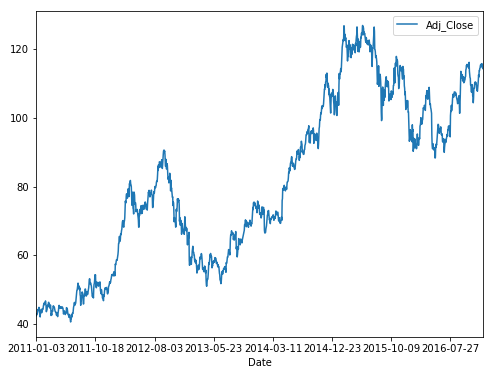

In [7]:
df_apple.plot(figsize=(8,6));

**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

In [8]:
file_amazon = 'precios/AMZN.csv'
file_microsoft = 'precios/MSFT.csv'
file_nvidia = 'precios/NVDA.csv'

df_amazon = pd.read_csv(file_amazon, index_col='Date', usecols=['Date', 'Adj_Close'])
df_microsoft = pd.read_csv(file_microsoft, index_col='Date', usecols=['Date', 'Adj_Close'])
df_nvidia = pd.read_csv(file_nvidia, index_col='Date', usecols=['Date', 'Adj_Close'])

In [9]:
closes = pd.DataFrame(index=df_amazon.index, columns=['AAPL', 'AMZN', 'MSFT', 'NVDA'])
closes.index.name = 'Date'
closes['AAPL'] = df_apple
closes['AMZN'] = df_amazon
closes['MSFT'] = df_microsoft
closes['NVDA'] = df_nvidia
closes

,AAPL,AMZN,MSFT,NVDA
Date,,,,
2011-01-03,42.357094,184.220001,23.325636,14.677008
2011-01-04,42.578156,185.009995,23.417341,14.630622
2011-01-05,42.926441,187.419998,23.342314,15.753201
2011-01-06,42.891743,185.860001,24.025904,17.933416
2011-01-07,43.198914,185.490005,23.842505,18.434401
2011-01-10,44.012455,184.679993,23.525713,19.139486
2011-01-11,43.908348,184.339996,23.434010,18.842609
2011-01-12,44.265644,184.080002,23.800816,21.662971
2011-01-13,44.427586,185.529999,23.500708,21.700079


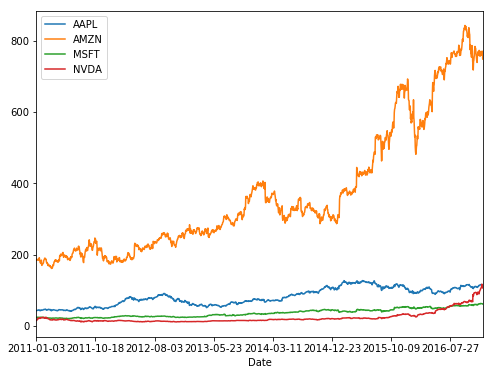

In [10]:
closes.plot(figsize=(8,6));

## 2. Descargar directamente los datos
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader*

- Anaconda prompt

https://pandas-datareader.readthedocs.io/en/latest/

In [12]:
from pandas_datareader import data

Utilizaremos la función `data.DataReader`...

In [65]:
help(data.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED),
    Kenneth French's data library, and the SEC's EDGAR Index.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (yahoo, google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("yahoo", "yahoo-actions", "yahoo-dividends",
        "google", "fred", "ff", or "edgar-index")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause

In [13]:
# Definimos los instrumentos que vamos a descargar. Como antes tendremos Apple, Amazon, Microsoft y Nvidia.
tickers = ['AAPL', 'AMZN', 'MSFT', 'NVDA']

# Definimos que fuente online vamos a usar (yahoo finance)
data_source = 'yahoo'

# Queremos los datos desde 01/01/2011 hasta 31/12/2016.
start_date = '2011-01-01'
end_date = '2016-12-31'

# Usamos la función DataReader. Si, así de fácil...
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

¿Qué contiene esta variable?

In [15]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1510 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2016-12-30 00:00:00 to 2011-01-03 00:00:00
Minor_axis axis: AAPL to NVDA

Como antes, solo nos interesan los precios de cierre ajustados...

In [17]:
# Notar que los índices se indican como Major_axis
closes = panel_data.ix['Adj Close']
closes

,AAPL,AMZN,MSFT,NVDA
Date,,,,
2016-12-30,114.396751,749.869995,61.088055,106.399620
2016-12-29,115.295570,765.150024,61.835197,111.074669
2016-12-28,115.325203,772.130005,61.923668,108.901627
2016-12-27,115.819054,771.400024,62.208755,116.945885
2016-12-23,115.088142,760.590027,62.169441,109.429932
2016-12-22,114.860977,766.340027,62.474186,106.768440
2016-12-21,115.621513,770.599976,62.464359,105.492531
2016-12-20,115.512863,771.219971,62.464359,104.834633
2016-12-19,115.206673,766.000000,62.543003,101.305916


Reordenamos las fechas...

In [18]:
# Generamos todas los días entre las fechas dadas
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Reindizamos en este orden
closes = closes.reindex(all_weekdays)
closes

,AAPL,AMZN,MSFT,NVDA
2011-01-03,42.357094,184.220001,23.325636,14.677008
2011-01-04,42.578156,185.009995,23.417341,14.630622
2011-01-05,42.926441,187.419998,23.342314,15.753201
2011-01-06,42.891743,185.860001,24.025904,17.933416
2011-01-07,43.198914,185.490005,23.842505,18.434401
2011-01-10,44.012455,184.679993,23.525713,19.139486
2011-01-11,43.908348,184.339996,23.434010,18.842609
2011-01-12,44.265644,184.080002,23.800816,21.662971
2011-01-13,44.427586,185.529999,23.500708,21.700079
2011-01-14,44.787437,188.750000,23.592407,21.885632


Las fechas para las que no se tienen datos quedan marcadas con `ǸaN`

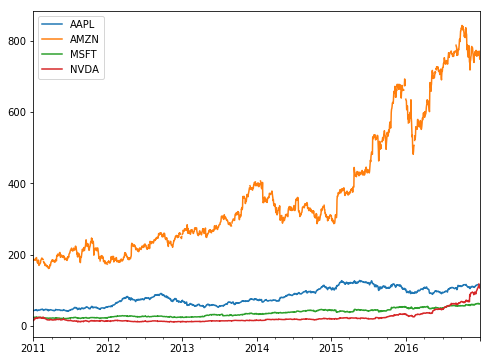

In [19]:
# Se verán 'huecos' en la gráfica
closes.plot(figsize=(8,6));

In [20]:
# Llenamos los huecos con el precio de cierre del día anterior
closes = closes.fillna(method='ffill')
closes

,AAPL,AMZN,MSFT,NVDA
2011-01-03,42.357094,184.220001,23.325636,14.677008
2011-01-04,42.578156,185.009995,23.417341,14.630622
2011-01-05,42.926441,187.419998,23.342314,15.753201
2011-01-06,42.891743,185.860001,24.025904,17.933416
2011-01-07,43.198914,185.490005,23.842505,18.434401
2011-01-10,44.012455,184.679993,23.525713,19.139486
2011-01-11,43.908348,184.339996,23.434010,18.842609
2011-01-12,44.265644,184.080002,23.800816,21.662971
2011-01-13,44.427586,185.529999,23.500708,21.700079
2011-01-14,44.787437,188.750000,23.592407,21.885632


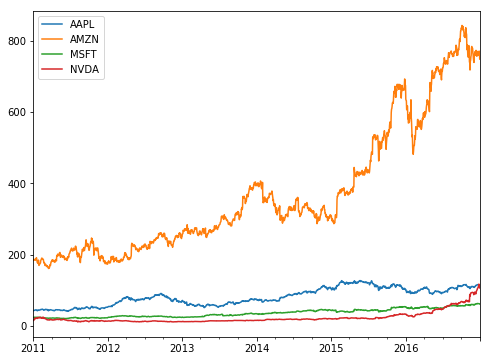

In [21]:
# Gráfico limpio...
closes.plot(figsize=(8,6));

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [86]:
closes.describe()

,AAPL,AMZN,MSFT,NVDA
count,1565.000000,1565.000000,1565.000000,1565.000000
mean,81.224757,370.713157,35.618638,22.692051
std,24.595598,184.086742,11.534218,16.955522
min,40.525654,160.970001,20.013088,10.557797
25%,59.079132,228.289993,25.197577,13.480210
50%,78.010452,310.029999,33.699532,17.358208
75%,104.162621,438.559998,44.244453,21.926655
max,126.941574,844.359985,62.543003,116.945885


___
Recapitulando, hoy aprendimos a obtener datos con pandas, tanto desde archivos de texto separados por comas, como directamente desde fuentes remotas.
- Para nuestra aplicación resulta más útil y más fácil obtenerlos directamente desde Yahoo Finance.
- Sin embargo, muchas veces tendrán que adquirir los datos desde planillas de Excel y  por tanto deben tener este conocimiento.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>